# Supervised Learning

## T0.
(a) Import Data


In [1]:
import math
import pandas as pd
import numpy as np
from scipy.linalg import inv, det

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('ds07.csv')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,class
0,0.617,0.953,2.0,-4.162,1.0,0.0693,0.1190,0.000,0.3310,0.5940,154.964,192200.0,0
1,0.893,0.480,1.0,-3.728,0.0,0.3560,0.0085,0.000,0.1160,0.3820,86.976,170638.0,0
2,0.816,0.726,5.0,-3.998,0.0,0.1290,0.0990,0.000,0.3720,0.6500,136.048,253390.0,0
3,0.807,0.425,7.0,-8.452,1.0,0.0656,0.0169,0.891,0.0614,0.6600,125.987,308929.0,0
4,0.713,0.389,1.0,-8.157,1.0,0.0839,0.1650,0.637,0.0706,0.2170,178.070,167497.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.857,0.621,9.0,-6.376,0.0,0.0824,0.1480,0.000,0.0865,0.6680,97.986,204467.0,1
500,0.843,0.391,2.0,-7.899,1.0,0.0845,0.1810,0.000,0.1370,0.4960,129.972,160627.0,1
501,0.654,0.630,10.0,-4.644,1.0,0.0259,0.1530,0.000,0.1110,0.4300,89.991,167693.0,1
502,0.505,0.340,4.0,-9.005,1.0,0.0438,0.5760,0.000,0.2100,0.0916,101.993,206459.0,1


(b) Normalize the dataset

In [3]:
#Case A
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
dfA = pd.DataFrame(scaler.transform(df),columns=df.columns)
dfA['class'] = df['class']
dfA

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,class
0,0.556916,0.954128,0.181818,0.821527,1.0,0.072033,0.123444,0.000000,0.324465,0.600043,0.697354,0.301882,0
1,0.894737,0.449541,0.090909,0.850778,0.0,0.538211,0.008817,0.000000,0.101018,0.371496,0.183935,0.255503,0
2,0.800490,0.711969,0.454545,0.832581,0.0,0.169106,0.102697,0.000000,0.367075,0.660414,0.554508,0.433500,0
3,0.789474,0.390868,0.636364,0.532385,1.0,0.066016,0.017531,0.952941,0.044274,0.671194,0.478531,0.552962,0
4,0.674419,0.352464,0.090909,0.552268,1.0,0.095772,0.171162,0.681283,0.053835,0.193618,0.871842,0.248747,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.850673,0.599957,0.818182,0.672306,0.0,0.093333,0.153527,0.000000,0.070360,0.679819,0.267078,0.328268,1
500,0.833537,0.354598,0.181818,0.569657,1.0,0.096748,0.187759,0.000000,0.122843,0.494394,0.508624,0.233969,1
501,0.602203,0.609558,0.909091,0.789041,1.0,0.001463,0.158714,0.000000,0.095822,0.423243,0.206703,0.249168,1
502,0.419829,0.300192,0.363636,0.495114,1.0,0.030569,0.597510,0.000000,0.198711,0.058430,0.297337,0.332553,1


In [5]:
#Case B
pca = PCA(n_components = 2)
dfB = pca.fit(df).transform(df)
columns = ['Feature1','Feature2']
dfB = pd.DataFrame(dfB, columns=columns)
scaler.fit(dfB)
dfB = pd.DataFrame(scaler.transform(dfB),columns=dfB.columns)
dfB['class'] = df['class']
dfB


,Feature1,Feature2,class
0,0.301882,0.700825,0
1,0.255503,0.191712,0
2,0.433500,0.566174,0
3,0.552962,0.496945,0
4,0.248747,0.870492,0
...,...,...,...
499,0.328268,0.276918,1
500,0.233969,0.511099,1
501,0.249168,0.213311,1
502,0.332553,0.307277,1


## T1. (Only for case B)

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
dfB_Train, dfB_Test = train_test_split(dfB, test_size=0.3, random_state=100)

# Separamos las clases 
dfW0 = dfB_Train[dfB_Train['class'] == 0].drop('class', axis=1)
dfW1 = dfB_Train[dfB_Train['class'] == 1].drop('class', axis=1)

# Calculamos la media de cada caracteristica de cada clase
meanW0 = np.array([dfW0['Feature1'].mean() , dfW0['Feature2'].mean()])
meanW1 = np.array([dfW1['Feature1'].mean() , dfW1['Feature2'].mean()])

# Calcular la media y la matriz de covarianza para cada clase
covMatrixW0 = np.cov(dfW0, rowvar=False)
covMatrixW1 = np.cov(dfW1, rowvar=False)


#CREAMOS LA FUNCION DISCRIMINANTE
prior = 0.5  # Clases equiprobables
c0 = - 0.5 * np.log(det(covMatrixW0)) - np.log(2*math.pi)
c1 = - 0.5 * np.log(det(covMatrixW1)) - np.log(2*math.pi)

# Calculamos las predicciones de cada una de las variables de Test

X = np.array(dfB_Test[['Feature1', 'Feature2']])
y = np.array(dfB_Test['class'])
predictions = []

for i in range(len(X)):
    g0 = -0.5 * X[i].T @ inv(covMatrixW0) @ X[i] + 0.5 * X[i].T @ inv(covMatrixW0) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrixW0) @ X[i] - 0.5 * meanW0.T @ inv(covMatrixW0) @ meanW0 + np.log(prior) + c0
    g1 = -0.5 * X[i].T @ inv(covMatrixW1) @ X[i] + 0.5 * X[i].T @ inv(covMatrixW1) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrixW1) @ X[i] - 0.5 * meanW1.T @ inv(covMatrixW1) @ meanW1 + np.log(prior) + c1

    if g0 > g1:
        predictions.append(0)
    else:
        predictions.append(1)


#Calculamos la precision del modelo
accuracy = accuracy_score(y, predictions)
print('Precisión (Accuracy):', (accuracy*100).round(2),'%')

Precisión (Accuracy): 67.76 %


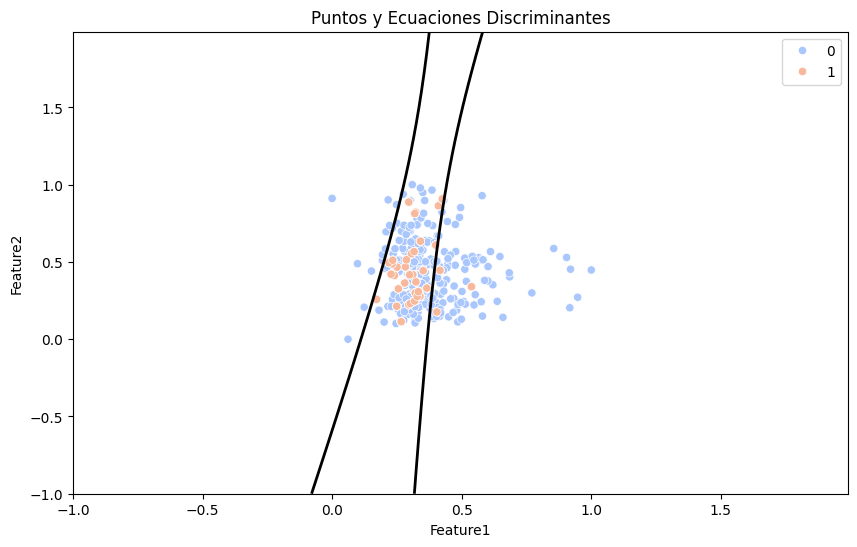

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv, det
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Supongamos que ya has realizado la división y el cálculo de las medias y covarianzas

# Crea una malla de puntos para la visualización
x_min, x_max = dfB['Feature1'].min() - 1, dfB['Feature1'].max() + 1
y_min, y_max = dfB['Feature2'].min() - 1, dfB['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calcula las funciones discriminantes para cada punto en la malla
Z0 = np.zeros_like(xx)
Z1 = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        g0 = -0.5 * point.T @ inv(covMatrixW0) @ point + 0.5 * point.T @ inv(covMatrixW0) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrixW0) @ point - 0.5 * meanW0.T @ inv(covMatrixW0) @ meanW0 + np.log(prior) + c0
        g1 = -0.5 * point.T @ inv(covMatrixW1) @ point + 0.5 * point.T @ inv(covMatrixW1) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrixW1) @ point - 0.5 * meanW1.T @ inv(covMatrixW1) @ meanW1 + np.log(prior) + c1
        Z0[i, j] = g0
        Z1[i, j] = g1

# Grafica los puntos y las regiones de decisión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='class', data=dfB, palette='coolwarm', legend='full')
plt.contour(xx, yy, Z0-Z1, levels=[0], linewidths=2, colors='black')  # Línea de decisión

plt.title('Quadratic Bayesian Clasifier')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper right')
plt.show()


## T2. (Only for case B)

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba
dfB_Train, dfB_Test = train_test_split(dfB, test_size=0.3, random_state=100)

# Separamos las clases 
dfW0 = dfB_Train[dfB_Train['class'] == 0].drop('class', axis=1)
dfW1 = dfB_Train[dfB_Train['class'] == 1].drop('class', axis=1)

# Calculamos la media de cada caracteristica de cada clase
meanW0 = np.array([dfW0['Feature1'].mean() , dfW0['Feature2'].mean()])
meanW1 = np.array([dfW1['Feature1'].mean() , dfW1['Feature2'].mean()])

#Calculamos una sola matriz para todas las clases
covMatrix = np.cov(dfB_Train.drop('class', axis=1), rowvar=False)

#CREAMOS LA FUNCION DISCRIMINANTE
prior = 0.5  # Clases equiprobables
c = - 0.5 * np.log(det(covMatrix)) - np.log(2*math.pi)

# Calculamos las predicciones de cada una de las variables de Test

X = np.array(dfB_Test[['Feature1', 'Feature2']])
y = np.array(dfB_Test['class'])
predictions = []

for i in range(len(X)):
    g0 = -0.5 * X[i].T @ inv(covMatrix) @ X[i] + 0.5 * X[i].T @ inv(covMatrix) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrixW0) @ X[i] - 0.5 * meanW0.T @ inv(covMatrixW0) @ meanW0 + np.log(prior) + c
    g1 = -0.5 * X[i].T @ inv(covMatrix) @ X[i] + 0.5 * X[i].T @ inv(covMatrix) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrixW1) @ X[i] - 0.5 * meanW1.T @ inv(covMatrixW1) @ meanW1 + np.log(prior) + c

    if g0 > g1:
        predictions.append(0)
    else:
        predictions.append(1)


#Calculamos la precision del modelo
accuracy = accuracy_score(y, predictions)
print('Precisión (Accuracy):', (accuracy*100).round(2),'%')




Precisión (Accuracy): 34.21 %


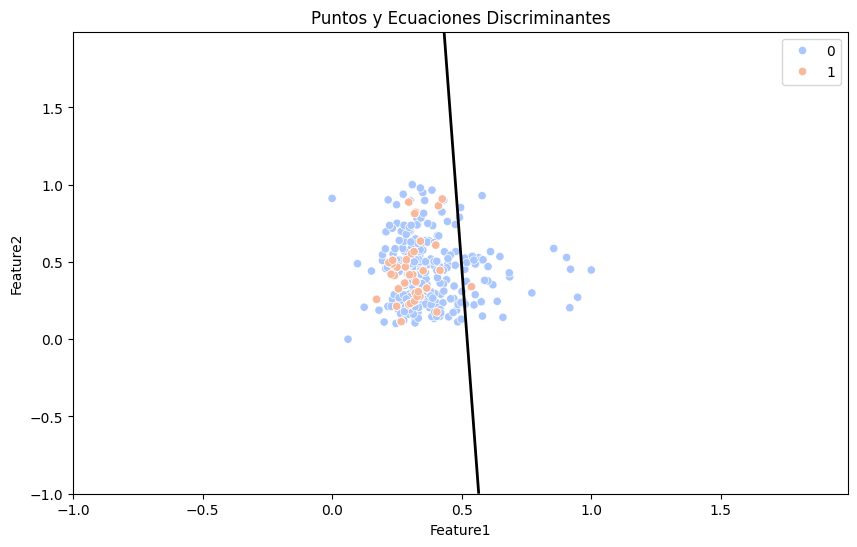

In [11]:
# Crea una malla de puntos para la visualización
x_min, x_max = dfB['Feature1'].min() - 1, dfB['Feature1'].max() + 1
y_min, y_max = dfB['Feature2'].min() - 1, dfB['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calcula las funciones discriminantes para cada punto en la malla
Z0 = np.zeros_like(xx)
Z1 = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        g0 = -0.5 * point.T @ inv(covMatrix) @ point + 0.5 * point.T @ inv(covMatrix) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrix) @ point - 0.5 * meanW0.T @ inv(covMatrix) @ meanW0 + np.log(prior) + c0
        g1 = -0.5 * point.T @ inv(covMatrix) @ point + 0.5 * point.T @ inv(covMatrix) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrix) @ point - 0.5 * meanW1.T @ inv(covMatrix) @ meanW1 + np.log(prior) + c1
        Z0[i, j] = g0
        Z1[i, j] = g1

# Grafica los puntos y las regiones de decisión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='class', data=dfB, palette='coolwarm', legend='full')
plt.contour(xx, yy, Z0-Z1, levels=[0], linewidths=2, colors='black')  # Línea de decisión

plt.title('Linear Bayesian Clasifier')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper right')
plt.show()